In [2]:
import struct


In [11]:
result =struct.pack("f",3.1415926)
print(result)
#struct.calcsize("f")


b'\xda\x0fI@'


In [10]:
#calculate vect num, triangle num
#id and type/with or without uv
#read in vects
#read in triangle index
#read in normal
#read in uv
#the file would start with the id(4 byte u8) type(4byte) vects number(2byte u16) triangle number(2byte u16)
#12 bytes totally for information

4

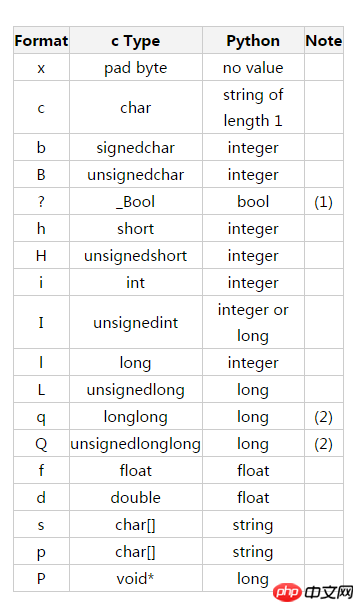

In [1]:
fileName = "D:\\project\\3d\\model\\ship2_72tri.obj"
outputType = "cFile" #hexFile
textureSize = 128
meshId = 1
#create bounding box
sizeX = 12.5893
sizeY = 61.1076
sizeZ = 37.7013

In [19]:
v = []#output vector
vn = []#
vt =[]
fvIdx=[]#output face index
fvtIdx=[]
fvnIdx=[]
uvOutput=[]#uv output directly
normalOutput =[]#normal output directly
with open(fileName,"r") as file:
    objDatalines = file.readlines()

#print(objDatalines)
for line in objDatalines:
    line =line[:-2]
    if (line[0]=="#"):
        continue
    line = line.split(" ")


    for element in line:
        if element =='':
            line.remove(element)

    
    if line[0] == "v" : #a vect line
        #print(line[1])
        v.append(float(line[1]))
        v.append(float(line[2]))
        v.append(float(line[3]))
    if line[0] == "vn" :#normal vect for face
        #print(line[1])
        vn.append(float(line[1]))
        vn.append(float(line[2]))
        vn.append(float(line[3]))
    if line[0] == "vt":
        #print(line[1])
        mapu = int(round(float(line[1])*(textureSize-1)))
        mapv = int(round(float(line[2])*(textureSize-1)))
        if mapu<0:
            mapu=0
        if mapu>=textureSize:
            mapu=textureSize -1
        if mapv<0:
            mapv=0
        if mapv>=textureSize:
            mapv=textureSize -1    
            
        vt.append(mapu)
        vt.append(mapv)

for line in objDatalines:
    line = line[:-1]
    line = line.split(" ")
    for element in line:
        if element =='':
            line.remove(element)

    if line[0] == "f":

        #print(line)
        #v/vt/vn
        faceData0 = line[1].split("/")
        
        fvIdx.append(int(faceData0[0])-1)
        fvtIdx.append(int(faceData0[1])-1)
        fvnIdx.append(int(faceData0[2])-1)
        faceData1 = line[2].split("/")
        fvIdx.append(int(faceData1[0])-1)
        fvtIdx.append(int(faceData1[1])-1)
        fvnIdx.append(int(faceData1[2])-1)
        faceData2 = line[3].split("/")
        fvIdx.append(int(faceData2[0])-1)
        fvtIdx.append(int(faceData2[1])-1)
        fvnIdx.append(int(faceData2[2])-1)

#create output array
for uvIdx in fvtIdx:
    
    mapu = vt[(uvIdx)*2]
    if mapu>=textureSize:
        mapu = textureSize -1;
    if mapu<0:
        mapu=0
    mapv = vt[(uvIdx)*2+1]
    if mapv>=textureSize:
        mapv = textureSize -1;
    if mapv<0:
        mapv=0
    uvOutput.append(mapu)
    uvOutput.append(mapv)

if (fvnIdx[0]!=fvnIdx[1]):
    print("Not face normal!\n")

for i in range(int(len(fvnIdx)/3)):
    normalOutput.append(vn[(fvnIdx[i*3])*3])
    normalOutput.append(vn[(fvnIdx[i*3])*3+1])
    normalOutput.append(vn[(fvnIdx[i*3])*3+2])
     
    

In [11]:
#cal the bound box

vx=[]
vy=[]
vz=[]
for i in range(len(v)//3):
    vx.append(v[3*i])
    vy.append(v[3*i+1])
    vz.append(v[3*i+2])
vx.sort()
vy.sort()
vz.sort()
vxMin=vx[0]
vxMax=vx[-1]
vyMin = vy[0]
vyMax= vy[-1]
vzMin= vz[0]
vzMax= vz[-1]

In [18]:
nameId = fileName.split("\\")[-1][:-4]
with open(fileName[:-3]+"c",'w') as outFile:
    with open(fileName[:-3]+"h",'w') as outHFile:
        outHFile.write("#ifndef __"+nameId+"_H__\n")
        outHFile.write("#define __"+nameId+"_H__\n")
        outHFile.write("#include <stdint.h> \n")
        outFile.write("#include \""+fileName[:-3].split('\\')[-1]+"h\" \n")
        outFile.write("#include \"b3dlib.h\"\n")
        outFile.write("const float "+nameId+"_vect["+str(len(v))+"]={\n")
        outHFile.write("extern const float "+nameId+"_vect["+str(len(v))+"];\n")
        rowNum = int(len(v)/6)
        rowRest = len(v)%6
        for i in range(rowNum):
            outputline = "\t"
            for j in range(6):
                outputline += (str(v[6*i+j])+'f, ')
            outputline +='\n'
            outFile.write(outputline)
        if rowRest !=0:
            outputline="\t"
            for i in range(rowRest):
                outputline +=(str(v[6*rowNum+i])+'f, ')
            outputline +='\n'
            outFile.write(outputline)
        outFile.write("};\n")
        outFile.write("const float "+nameId+"_normal["+str(len(normalOutput))+"]={\n")
        outHFile.write("extern const float "+nameId+"_normal["+str(len(normalOutput))+"];\n")
        rowNum = int(len(normalOutput)/6)
        rowRest = len(normalOutput)%6
        for i in range(rowNum):
            outputline = "\t"
            for j in range(6):
                outputline += (str(normalOutput[6*i+j])+'f, ')
            outputline +='\n'
            outFile.write(outputline)
        if rowRest !=0:
            outputline="\t"
            for i in range(rowRest):
                outputline +=(str(normalOutput[6*rowNum+i])+'f, ')
            outputline +='\n'
            outFile.write(outputline)
        outFile.write("};\n")
        outFile.write("const uint16_t "+nameId+"_triIdx["+str(len(fvIdx))+"]={\n")
        outHFile.write("extern const uint16_t "+nameId+"_triIdx["+str(len(fvIdx))+"];\n")
        rowNum = int(len(fvIdx)/9)
        rowRest = len(fvIdx)%9
        for i in range(rowNum):
            outputline = "\t"
            for j in range(9):
                outputline += (str(fvIdx[9*i+j])+', ')
            outputline +='\n'
            outFile.write(outputline)
        if rowRest !=0:
            outputline="\t"
            for i in range(rowRest):
                outputline +=(str(fvIdx[9*rowNum+i])+', ')
            outputline +='\n'
            outFile.write(outputline)
        outFile.write("};\n")
        outFile.write("const uint8_t "+nameId+"_uv["+str(len(uvOutput))+"]={\n")
        outHFile.write("extern const uint8_t "+nameId+"_uv["+str(len(uvOutput))+"];\n")
        rowNum = int(len(uvOutput)/8)
        rowRest = len(uvOutput)%8
        for i in range(rowNum):
            outputline = "\t"
            for j in range(8):
                outputline += (str(uvOutput[8*i+j])+', ')
            outputline +='\n'
            outFile.write(outputline)
        if rowRest !=0:
            outputline="\t"
            for i in range(rowRest):
                outputline +=(str(uvOutput[8*rowNum+i])+', ')
            outputline +='\n'
            outFile.write(outputline)
        outFile.write("};\n")
        outFile.write("const B3L_Mesh_t "+nameId+"_mesh={\n")
        outFile.write("\t.id = "+str(meshId)+",\n")
        outFile.write("\t.vectNum = "+str(int(len(v)/3))+",\n")
        outFile.write("\t.triNum = "+str(int(len(fvIdx)/3))+",\n")
        outFile.write("\t.pVect = (float *)"+nameId+"_vect,\n")
        outFile.write("\t.pTri = (uint16_t *)"+nameId+"_triIdx,\n")
        outFile.write("\t.pUv = (uint8_t *)"+nameId+"_uv,\n")
        outFile.write("\t.pNormal = (float *)"+nameId+"_normal,\n")
        outFile.write("};\n")
        outHFile.write("extern const B3L_Mesh_t "+nameId+"_mesh;\n")
        
        #reference point is in the middle of the model
        bound = []
        outFile.write("const float "+nameId+"bound[24]={\n")
        outFile.write("\t"+str(vxMax)+"f, "+str(vyMax)+"f, "+str(vzMax)+"f,\n")
        bound.append(vxMax)
        bound.append(vyMax)
        bound.append(vzMax)
        outFile.write("\t"+str(vxMin)+"f, "+str(vyMin)+"f, "+str(vzMin)+"f,\n")
        bound.append(vxMin)
        bound.append(vyMin)
        bound.append(vzMin)
        outFile.write("\t"+str(vxMax)+"f, "+str(vyMax)+"f, "+str(vzMin)+"f,\n")
        bound.append(vxMax)
        bound.append(vyMax)
        bound.append(vzMin)
        outFile.write("\t"+str(vxMax)+"f, "+str(vyMin)+"f, "+str(vzMin)+"f,\n")
        bound.append(vxMax)
        bound.append(vyMin)
        bound.append(vzMin)
        outFile.write("\t"+str(vxMin)+"f, "+str(vyMax)+"f, "+str(vzMax)+"f,\n")
        bound.append(vxMin)
        bound.append(vyMax)
        bound.append(vzMax)
        outFile.write("\t"+str(vxMin)+"f, "+str(vyMax)+"f, "+str(vzMin)+"f,\n")
        bound.append(vxMin)
        bound.append(vyMax)
        bound.append(vzMin)
        outFile.write("\t"+str(vxMin)+"f, "+str(vyMin)+"f, "+str(vzMax)+"f,\n")
        bound.append(vxMin)
        bound.append(vyMin)
        bound.append(vzMax)
        outFile.write("\t"+str(vxMax)+"f, "+str(vyMin)+"f, "+str(vzMax)+"f,\n")
        bound.append(vxMax)
        bound.append(vyMin)
        bound.append(vzMax)
        outFile.write("};\n")
        outHFile.write("extern const float "+nameId+"bound[24];\n")
        outHFile.write("#endif \n")

In [ ]:
f = open('my_file', 'w+b')
byte_arr = [120, 3, 255, 0, 100]
binary_format = bytearray(byte_arr)
f.write(binary_format)
f.close()

In [62]:
#create bounding box
sizeX = 1.2
sizeY = 3.3
sizeZ = 4.5
#reference point is in the middle of the model
halfX = sizeX/2.0
halfZ = sizeZ/2.0
halfY = sizeY/2.0
bound = []
print(str(halfX)+"f, "+str(halfY)+"f, "+str(halfZ)+"f, ")
bound.append(halfX)
bound.append(halfY)
bound.append(halfZ)
print(str(-1.0*halfX)+"f, "+str(halfY)+"f, "+str(halfZ)+"f, ")
bound.append(-1.0*halfX)
bound.append(halfY)
bound.append(halfZ)
print(str(halfX)+"f, "+str(-1.0*halfY)+"f, "+str(halfZ)+"f, ")
bound.append(halfX)
bound.append(-1.0*halfY)
bound.append(halfZ)
print(str(halfX)+"f, "+str(halfY)+"f, "+str(-1.0*halfZ)+"f, ")
bound.append(halfX)
bound.append(halfY)
bound.append(-1.0*halfZ)
print(str(-1.0*halfX)+"f, "+str(-1.0*halfY)+"f, "+str(halfZ)+"f, ")

print(str(-1.0*halfX)+"f, "+str(halfY)+"f, "+str(-1.0*halfZ)+"f, ")
print(str(halfX)+"f, "+str(-1.0*halfY)+"f, "+str(-1.0*halfZ)+"f, ")
print(str(-1.0*halfX)+"f, "+str(-1.0*halfY)+"f, "+str(-1.0*halfZ)+"f, ")

0.6f, 1.65f, 2.25f, 
-0.6f, 1.65f, 2.25f, 
0.6f, -1.65f, 2.25f, 
0.6f, 1.65f, -2.25f, 
-0.6f, -1.65f, 2.25f, 
-0.6f, 1.65f, -2.25f, 
0.6f, -1.65f, -2.25f, 
-0.6f, -1.65f, -2.25f, 


In [84]:
a=struct.pack('f',1.2)
print("0x%x"%(a[0]))

0x9a


In [76]:
#file struct 4byte:type info 4byte: id 2byte:vect num 2byte: tri num

b'\x9a\x99\x99?\xcd\xccL@'

In [91]:
vectNum = int(len(v)/3)
triNum = int(len(fvIdx)/3)
wholeData = struct.pack("I",1)#1 is texture mesh type
wholeData +=struct.pack("I",meshId)
wholeData +=struct.pack("H",vectNum)
wholeData +=struct.pack("H",triNum)
for element in v:
    wholeData +=struct.pack("f",element)
for element in normalOutput:
    wholeData +=struct.pack("f",element)    
for element in bound:
    wholeData +=struct.pack("f",element)
for element in fvIdx:
    wholeData +=struct.pack("H",element)
for element in uvOutput:
    wholeData +=struct.pack("B",element)


In [92]:
wholeData

b'\x01\x00\x00\x00\x01\x00\x00\x00\x08\x00\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x80?\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x80?\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x80?\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\x00\x00\x80\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xbf\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80?\x9a\x99\x19?33\xd3?\x00\x00\x10@\x9a\x99\x1